# Proyek Analisis Data: Bike Sharing Dataset 
- **Nama:** Muhammad Aldy Naufal Fadhilah
- **Email:** aldy.naufal02@gmail.com
- **ID Dicoding:** aldy_naufal

## Import Semua Packages/Library yang Digunakan

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Sebelum memulai melakukakn analissi data saya memerlukan bebrapa library yang dapat membantu saya diantaranya:

1. **Pandas (`import pandas as pd`)**  
   Pandas adalah library yang sangat berguna untuk memanipulasi, membersihkan, dan menganalisis data. Dengan Pandas, Anda dapat membaca data dari berbagai sumber (CSV, Excel, SQL, dll.), melakukan filtering, agregasi, merging, serta transformasi data. Struktur data utama di Pandas adalah *DataFrame* dan *Series* yang memungkinkan pengelolaan data secara efisien dan mudah dipahami.

2. **NumPy (`import numpy as np`)**  
   NumPy merupakan fondasi untuk komputasi numerik di Python. Library ini menyediakan array multidimensi yang sangat efisien dan mendukung operasi matematika yang kompleks. NumPy sangat berguna ketika Anda perlu melakukan perhitungan matematis, statistika, atau operasi vektor dan matriks dalam jumlah data yang besar.

3. **Matplotlib (`import matplotlib.pyplot as plt`)**  
   Matplotlib adalah library untuk membuat visualisasi data. Modul `pyplot` menyediakan antarmuka yang sederhana dan fleksibel untuk menghasilkan berbagai jenis grafik seperti grafik garis, scatter plot, histogram, dan banyak lagi. Visualisasi dengan Matplotlib membantu dalam memahami pola dan tren dalam data secara lebih visual.

4. **Seaborn (`import seaborn`)**  
   Seaborn dibangun di atas Matplotlib dan dirancang untuk membuat grafik statistik yang lebih menarik dan informatif. Dengan Seaborn, Anda bisa dengan mudah membuat plot seperti box plot, violin plot, heatmap, dan lain-lain dengan tampilan yang lebih estetis dan pengaturan default yang lebih baik. Seaborn juga terintegrasi dengan baik dengan DataFrame Pandas sehingga memudahkan eksplorasi data.

## Data Wrangling

### Gathering Data

In [79]:
data_aotizhongxin = pd.read_csv("dataset\PRSA_Data_Aotizhongxin_20130301-20170228.csv") 
data_changping = pd.read_csv("dataset\PRSA_Data_Changping_20130301-20170228.csv")
data_dingling = pd.read_csv("dataset\PRSA_Data_Dingling_20130301-20170228.csv")
data_dongsi = pd.read_csv("dataset\PRSA_Data_Dongsi_20130301-20170228.csv")
data_guanyuan = pd.read_csv("dataset\PRSA_Data_Guanyuan_20130301-20170228.csv")
data_gucheng = pd.read_csv("dataset\PRSA_Data_Gucheng_20130301-20170228.csv")
data_huairou = pd.read_csv("dataset\PRSA_Data_Huairou_20130301-20170228.csv")
data_nongzhanguan = pd.read_csv("dataset\PRSA_Data_Nongzhanguan_20130301-20170228.csv")
data_shunyi = pd.read_csv("dataset\PRSA_Data_Shunyi_20130301-20170228.csv")
data_tiantan = pd.read_csv("dataset\PRSA_Data_Tiantan_20130301-20170228.csv")
data_wanliu = pd.read_csv("dataset\PRSA_Data_Wanliu_20130301-20170228.csv")
data_wanshouxigong = pd.read_csv("dataset\PRSA_Data_Wanshouxigong_20130301-20170228.csv")

### **Membaca Data Kualitas Udara di Beijing**  

Sebelum memulai analisis, langkah pertama yang dilakukan adalah membaca 12 file CSV yang berisi data kualitas udara dari berbagai stasiun pemantauan di Beijing.  

### **1. Membaca File CSV dengan `pd.read_csv()`**  
- Setiap file CSV dibaca menggunakan fungsi `pd.read_csv()` dari pustaka `pandas`.  
- File-file tersebut berada dalam folder `dataset\`, dan masing-masing disimpan ke dalam variabel sesuai dengan lokasi stasiunnya.  
- Contoh pembacaan data dari stasiun **Aotizhongxin**:  
  ```python
  data_aotizhongxin = pd.read_csv("dataset/PRSA_Data_Aotizhongxin_20130301-20170228.csv")
  ```  
  Kode ini membaca file CSV dan menyimpannya dalam variabel `data_aotizhongxin`.  

### **2. Membaca Data dari 12 Stasiun Berbeda**  
- Terdapat **12 lokasi pemantauan** yang masing-masing memiliki data kualitas udara tersendiri.  
- Setiap lokasi diwakili oleh sebuah variabel, misalnya:  
  - `data_changping` untuk stasiun **Changping**  
  - `data_dingling` untuk stasiun **Dingling**  
  - `data_dongsi` untuk stasiun **Dongsi**  
  - Dan seterusnya hingga semua 12 stasiun terdata.  

### **3. Hasil dari Pembacaan Data**  
- Setelah semua file dibaca, terdapat **12 variabel** yang berisi data kualitas udara dari masing-masing stasiun di Beijing.  
- Data ini nantinya dapat digunakan untuk berbagai keperluan analisis, seperti:  
  - **Eksplorasi data** untuk memahami karakteristik dan distribusi kualitas udara.  
  - **Visualisasi** untuk melihat pola dan tren polusi udara dari waktu ke waktu.  
  - **Pemodelan prediksi** untuk memprediksi kualitas udara di masa mendatang.  

Dengan data yang telah terbaca dengan baik, langkah berikutnya adalah melakukan **pembersihan data (preprocessing)** sebelum dianalisis lebih lanjut.

In [80]:
# Menggabungkan semua dataset dengan outer join
data = pd.concat([
    data_aotizhongxin, data_changping, data_dingling, data_dongsi,
    data_guanyuan, data_gucheng, data_huairou, data_nongzhanguan,
    data_shunyi, data_tiantan, data_wanliu, data_wanshouxigong
], join="outer", ignore_index=True)

# Menyimpan hasil gabungan ke dalam file CSV jika diperlukan
data.to_csv("dashboard/Main_Data.csv", index=False)

Setelah semua data dari 12 stasiun pemantauan kualitas udara di Beijing berhasil dibaca, langkah selanjutnya adalah **menggabungkan seluruh dataset menjadi satu kesatuan**. Penggabungan ini dilakukan menggunakan fungsi `pd.concat()`, dengan **metode outer join** agar tidak ada data yang terhapus jika terdapat perbedaan kolom di beberapa dataset.  

Setiap dataset memiliki struktur kolom yang hampir sama, dengan satu-satunya perbedaan utama adalah nama stasiun pemantauan. Oleh karena itu, **menggabungkan semua data ke dalam satu dataframe** akan mempermudah analisis, karena kita tidak perlu berulang kali mengakses data dari berbagai variabel terpisah.  

Kode di atas menggabungkan semua dataset dan menyimpannya ke dalam variabel `data`. Argumen `ignore_index=True` digunakan agar indeks dari masing-masing dataset tidak dipertahankan dan diganti dengan indeks baru yang berkelanjutan. Setelah proses penggabungan selesai, data hasil gabungan kemudian disimpan dalam sebuah file CSV bernama `"dashboard/Main_Data.csv"` menggunakan `to_csv()`. Penyimpanan ini memungkinkan penggunaan data dalam berbagai keperluan, seperti eksplorasi lebih lanjut, analisis tren kualitas udara, atau bahkan visualisasi dalam dashboard interaktif.  

Dengan cara ini, analisis data menjadi lebih efisien, karena seluruh informasi dari berbagai stasiun sudah tersedia dalam satu tempat, memungkinkan kita untuk dengan mudah melakukan agregasi data berdasarkan lokasi, waktu, atau faktor lainnya.

### Assessing Data

Setelah data dari berbagai stasiun pemantauan kualitas udara digabungkan menjadi satu dataset utama, langkah selanjutnya adalah **melakukan asesmen (assessment) terhadap kualitas data**. Ini bertujuan untuk memahami struktur dataset, menemukan kemungkinan masalah seperti **nilai yang hilang (missing values)** atau **data duplikat**, dan memastikan data siap untuk dianalisis lebih lanjut.

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB




### **1. `data.info()` - Memeriksa Struktur Dataset**  
Kode ini digunakan untuk **menampilkan ringkasan informasi dataset**, seperti jumlah total entri (baris), tipe data di setiap kolom, serta jumlah nilai non-null dalam setiap kolom. Informasi ini berguna untuk:  
- Mengetahui apakah ada kolom yang memiliki **nilai kosong (NaN)**.  
- Memeriksa tipe data setiap kolom untuk memastikan kesesuaian dengan analisis yang akan dilakukan.  
- Mengetahui jumlah total baris dalam dataset setelah penggabungan.  


In [82]:
data.isna().sum()

No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64



### **2. `data.isna().sum()` - Mengecek Missing Values**  
Hasil dari `data.isna().sum()` menunjukkan bahwa terdapat beberapa kolom dengan **jumlah nilai yang hilang (NaN) cukup besar**, seperti:  
- **PM2.5** memiliki **8.739** nilai kosong.  
- **PM10** memiliki **6.449** nilai kosong.  
- **SO2** memiliki **9.021** nilai kosong.  
- **NO2** memiliki **12.116** nilai kosong.  
- **CO** memiliki **20.701** nilai kosong (tertinggi).  
- **O3** memiliki **13.277** nilai kosong.  
- Variabel cuaca seperti **TEMP, PRES, DEWP, dan RAIN** juga memiliki beberapa missing values, meskipun jumlahnya lebih sedikit dibandingkan variabel polutan.  
- **wd (arah angin)** memiliki **1.822** nilai kosong.  
- **WSPM (kecepatan angin)** memiliki **318** nilai kosong.  
- Kolom **No, year, month, day, hour, dan station** tidak memiliki missing values.  

Dari hasil ini, bisa disimpulkan bahwa:  
- Variabel polusi udara memiliki **banyak missing values**, sehingga perlu dipertimbangkan metode **imputasi** (pengisian nilai yang hilang) atau penghapusan data jika jumlahnya terlalu banyak.  
- Variabel cuaca seperti suhu (**TEMP**), tekanan udara (**PRES**), dan kelembapan udara (**DEWP**) juga memiliki beberapa nilai kosong yang harus diperhatikan sebelum analisis lebih lanjut.  


In [83]:
duplikat = data.groupby(data.columns.tolist()).filter(lambda x: len(x) > 1)
print(duplikat)

Empty DataFrame
Columns: [No, year, month, day, hour, PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, WSPM, station]
Index: []


### **3. Mengecek Data Duplikat dengan `groupby()`**  
Hasil pemeriksaan menunjukkan bahwa **tidak ditemukan data duplikat** dalam dataset (`Empty DataFrame`). Ini berarti setiap baris dalam dataset memiliki kombinasi nilai yang unik dan tidak ada entri yang berulang.  

Tidak adanya duplikat adalah **indikator yang baik**, karena jika ada data yang terduplikasi, itu dapat menyebabkan bias dalam analisis dan perhitungan statistik. Namun, tetap perlu dilakukan validasi lebih lanjut untuk memastikan bahwa penggabungan dataset telah dilakukan dengan benar dan tidak ada data yang terduplikasi secara tidak sengaja di tahap sebelumnya.  


### **Kesimpulan**  
Dengan hasil ini, langkah berikutnya dalam analisis data adalah:  
1. **Menangani Missing Values**  
   - Menghapus baris dengan terlalu banyak nilai kosong atau menggunakan metode imputasi seperti **rata-rata (mean)** atau **median**.  
   - Untuk kategori seperti **wd (arah angin)**, bisa menggunakan **modus (nilai yang paling sering muncul)**.  

2. **Memvalidasi Data**  
   - Meskipun tidak ditemukan duplikasi, perlu dicek apakah ada **inkonsistensi dalam data** seperti tanggal yang hilang atau data yang tidak masuk akal (misalnya suhu ekstrem atau polusi negatif).  

Dengan pemrosesan yang baik, dataset ini akan lebih siap untuk dieksplorasi lebih lanjut, baik untuk visualisasi tren maupun pemodelan prediksi kualitas udara di Beijing.

### Cleaning Data

Setelah melakukan asesmen data dan menemukan banyak missing values di berbagai kolom, langkah selanjutnya adalah **mengisi (imputasi) nilai yang hilang** agar dataset siap untuk analisis lebih lanjut. Berikut adalah cara dan alasan di balik pendekatan yang digunakan dalam kode:  

In [84]:
#Mengisi Missing Value 

# Isi nilai NaN pada kolom numerik dengan median masing-masing kolom
data.fillna(data.median(numeric_only=True), inplace=True)

# Isi nilai NaN pada kolom bertipe objek dengan string "NaN"
data.fillna("NaN", inplace=True)

data.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64


### **1. Mengisi Nilai NaN pada Kolom Numerik dengan Median**  
```python
data.fillna(data.median(numeric_only=True), inplace=True)
```
Kode ini menggantikan semua **nilai NaN pada kolom numerik** dengan **median dari masing-masing kolom**.  

**Mengapa menggunakan median?**  
- **Mengisi NaN untuk kolom yang isinya numerik menggunakan median**, karena median tidak terlalu terpengaruh oleh **outlier yang sangat tinggi**.  
  → Misalnya, jika ada satu nilai yang sangat ekstrem dalam suatu kolom (seperti polusi udara yang melonjak tajam karena kebakaran atau badai debu), maka **median tetap stabil**, sedangkan **mean bisa terpengaruh** secara signifikan.  
- **Cocok untuk data lingkungan seperti polusi udara**, karena distribusinya sering kali tidak normal dan memiliki lonjakan nilai tertentu di waktu-waktu tertentu.  

Dengan kode ini, kolom seperti **PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, dan WSPM** yang sebelumnya memiliki nilai hilang, sekarang sudah terisi dengan median masing-masing.  

---

### **2. Mengisi Nilai NaN pada Kolom Kategorikal dengan "NaN" (String)**  
```python
data.fillna("NaN", inplace=True)
```
Kode ini menggantikan **nilai NaN pada kolom bertipe objek** (seperti `wd`, yaitu arah angin) dengan string `"NaN"`.  

**Mengapa menggunakan string "NaN"?**  
- **Mengisi NaN untuk kolom yang isinya object menggunakan string "NaN"**, agar tetap mudah dibedakan dari nilai yang tersedia.  
- Dalam beberapa kasus, lebih baik **menyimpan informasi bahwa nilai itu tidak tersedia**, daripada menggantinya dengan nilai yang paling sering muncul (modus).  
- Bisa digunakan untuk analisis lebih lanjut, misalnya melihat apakah ada pola tertentu dalam data yang memiliki nilai kosong.  
- Jika data ini nantinya diubah menjadi fitur numerik (misalnya untuk model machine learning), kategori `"NaN"` bisa diubah menjadi kategori tersendiri.  

---

### **3. Memeriksa Kembali Missing Values**  
```python
data.isna().sum()
```
Setelah semua missing values diisi, kode ini digunakan untuk **memastikan bahwa tidak ada lagi nilai kosong dalam dataset**. Jika hasilnya menunjukkan **semua kolom memiliki nilai 0** untuk missing values, berarti proses imputasi telah berhasil dilakukan.  

---

### **Kesimpulan**  
Dengan langkah-langkah ini, dataset kini sudah **bebas dari missing values**, sehingga lebih siap untuk dilakukan analisis eksploratif, visualisasi, atau bahkan diterapkan ke model prediksi kualitas udara.  

Langkah selanjutnya bisa mencakup:  
1. **Eksplorasi data lebih lanjut** seperti distribusi variabel dan korelasi antar fitur.  
2. **Visualisasi data** untuk melihat pola kualitas udara berdasarkan waktu atau lokasi.  
3. **Membangun model prediksi** untuk memperkirakan kualitas udara di masa depan berdasarkan tren historis.

## Exploratory Data Analysis (EDA)

### Explore ...

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    420768 non-null  float64
 6   PM10     420768 non-null  float64
 7   SO2      420768 non-null  float64
 8   NO2      420768 non-null  float64
 9   CO       420768 non-null  float64
 10  O3       420768 non-null  float64
 11  TEMP     420768 non-null  float64
 12  PRES     420768 non-null  float64
 13  DEWP     420768 non-null  float64
 14  RAIN     420768 non-null  float64
 15  wd       420768 non-null  object 
 16  WSPM     420768 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


1. **`data.info()`**  
   - Mengecek tipe data setiap kolom dan memastikan tidak ada missing values setelah proses imputasi.  
   - Menunjukkan jumlah entri pada setiap kolom untuk memastikan dataset sudah siap dianalisis.  

In [86]:
data.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.278489,104.256193,15.641507,50.418633,1214.493362,56.981874,13.539885,1010.746658,2.491405,0.064416,1.729461
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.056799,91.108745,21.455419,34.642023,1133.542988,55.802413,11.430768,10.469168,13.787252,0.820626,1.245947
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,21.000000,36.000000,3.000000,24.000000,500.000000,12.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,109.000000,144.000000,19.000000,70.000000,1500.000000,80.000000,23.200000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


2. **`data.describe()`**  
   - Memberikan ringkasan statistik untuk kolom numerik, seperti **mean, median, min, max, dan distribusi kuartil**.  
   - Berguna untuk memahami skala data dan mendeteksi kemungkinan outlier.  

array([[<Axes: title={'center': 'No'}>, <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'hour'}>,
        <Axes: title={'center': 'PM2.5'}>,
        <Axes: title={'center': 'PM10'}>,
        <Axes: title={'center': 'SO2'}>],
       [<Axes: title={'center': 'NO2'}>, <Axes: title={'center': 'CO'}>,
        <Axes: title={'center': 'O3'}>, <Axes: title={'center': 'TEMP'}>],
       [<Axes: title={'center': 'PRES'}>,
        <Axes: title={'center': 'DEWP'}>,
        <Axes: title={'center': 'RAIN'}>,
        <Axes: title={'center': 'WSPM'}>]], dtype=object)

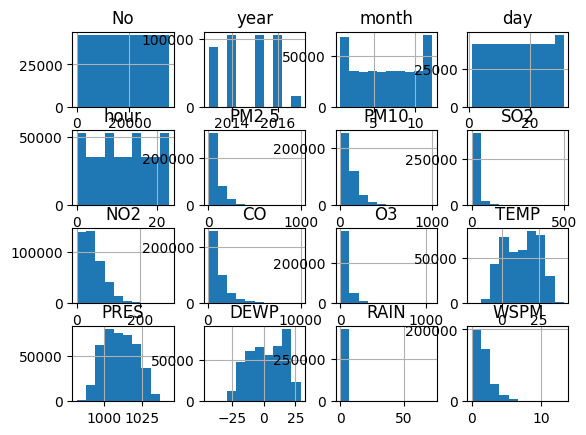

In [87]:
data.hist()

3. **`data.hist()`**  
   - Menampilkan distribusi data dalam bentuk histogram untuk melihat pola dan distribusi dari variabel numerik.  
   - Membantu dalam menentukan apakah variabel tertentu **terdistribusi normal, skewed (miring), atau memiliki nilai ekstrem** yang signifikan. 

### **Awal dari Eksplorasi Data**  
Setelah melakukan eksplorasi terhadap data yang telah dibersihkan, saya beranggapan bahwa data ini dapat saya jadikan sebagai **dataset untuk analisis tren kualitas udara di Beijing**.  

Beberapa potensi penggunaan dataset ini:  
1. **Analisis Pola dan Tren**  
   - Mengamati tren kualitas udara dari tahun ke tahun, bulan ke bulan, atau bahkan jam ke jam.  
   - Melihat bagaimana parameter seperti PM2.5, PM10, NO2, dan lainnya berubah seiring waktu dan kondisi cuaca.  

2. **Visualisasi Kualitas Udara**  
   - Membuat heatmap atau grafik interaktif untuk memetakan tingkat polusi berdasarkan lokasi dan waktu.  
   - Menganalisis hubungan antara variabel cuaca (seperti suhu dan tekanan udara) dengan tingkat polusi.  

3. **Pemodelan Prediktif**  
   - Menggunakan teknik machine learning untuk **memprediksi kualitas udara di masa mendatang** berdasarkan data historis.  
   - Melatih model regresi atau deep learning untuk memahami faktor-faktor utama yang mempengaruhi polusi udara.  

4. **Analisis Faktor Lingkungan**  
   - Mengevaluasi bagaimana faktor cuaca (seperti kelembaban, angin, dan curah hujan) berperan dalam perubahan kualitas udara.  
   - Mengidentifikasi apakah ada pola musiman yang berulang terkait dengan lonjakan polusi.  


Dengan dataset ini, saya dapat mengembangkan **dashboard interaktif**, melakukan analisis eksploratif lebih lanjut, atau membangun **model machine learning untuk memprediksi kualitas udara di Beijing**.

## Menentukan Pertanyaan Bisnis

Setelah melakukan eksplorasi data terkait kualitas udara di Beijing, saya merumuskan **dua pertanyaan utama** yang dapat membantu memahami pola dan tren polusi udara di berbagai stasiun pemantauan.  

#### **1. Bagaimana tren kualitas udara (AQI) di setiap stasiun dari tahun ke tahun?**  
**Rumus perhitungan AQI (Air Quality Index) untuk polutan utama seperti PM2.5 dan PM10:**  
\[ AQI = \frac{(I_{high} - I_{low})}{(C_{high} - C_{low})} \times (C - C_{low}) + I_{low} \]  
di mana:  
- \( C \) = Konsentrasi polutan dalam satuan µg/m³.  
- \( C_{high} \) dan \( C_{low} \) = Rentang batas konsentrasi yang sesuai dalam tabel AQI standar.  
- \( I_{high} \) dan \( I_{low} \) = Rentang indeks kualitas udara yang sesuai dengan batas konsentrasi tersebut.  

**Alasan pentingnya pertanyaan ini:**  
- Dapat memberikan **gambaran tren polusi udara** di setiap stasiun dalam periode waktu tertentu.  
- Membantu dalam memahami apakah kualitas udara di Beijing **membaik atau memburuk** dari tahun ke tahun.  
- Memungkinkan identifikasi pola musiman atau tahunan dalam perubahan kualitas udara.  

#### **2. Di stasiun mana dan pada tahun berapa terjadi kenaikan persentase polusi udara tertinggi? Apa penyebab utama kenaikan ini?**  
**Metode perhitungan kenaikan persentase polusi udara:**  
\[ \text{Persentase Kenaikan} = \frac{\text{Polusi Tahun N} - \text{Polusi Tahun N-1}}{\text{Polusi Tahun N-1}} \times 100\% \]  

**Alasan mengapa pertanyaan ini penting:**  
- Memungkinkan **identifikasi wilayah dengan peningkatan polusi tertinggi**, sehingga bisa dianalisis lebih lanjut.  
- Dapat membantu memahami **faktor-faktor penyebab kenaikan polusi**, seperti musim dingin (penggunaan batu bara meningkat), peningkatan jumlah kendaraan, atau faktor cuaca.  
- Berguna bagi pemerintah atau lembaga lingkungan untuk mengambil langkah mitigasi di lokasi dengan lonjakan polusi yang signifikan.  

Dengan menjawab dua pertanyaan ini, kita dapat memperoleh wawasan yang lebih mendalam tentang **tren polusi udara di Beijing**, serta memahami faktor-faktor yang berkontribusi terhadap fluktuasi kualitas udara di berbagai lokasi.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

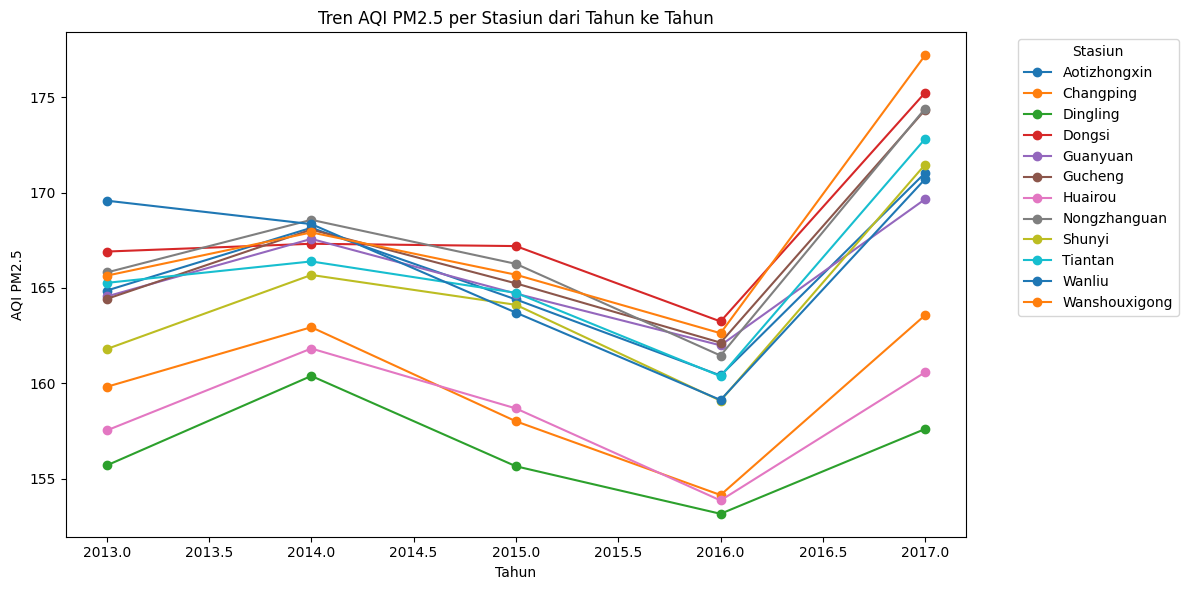

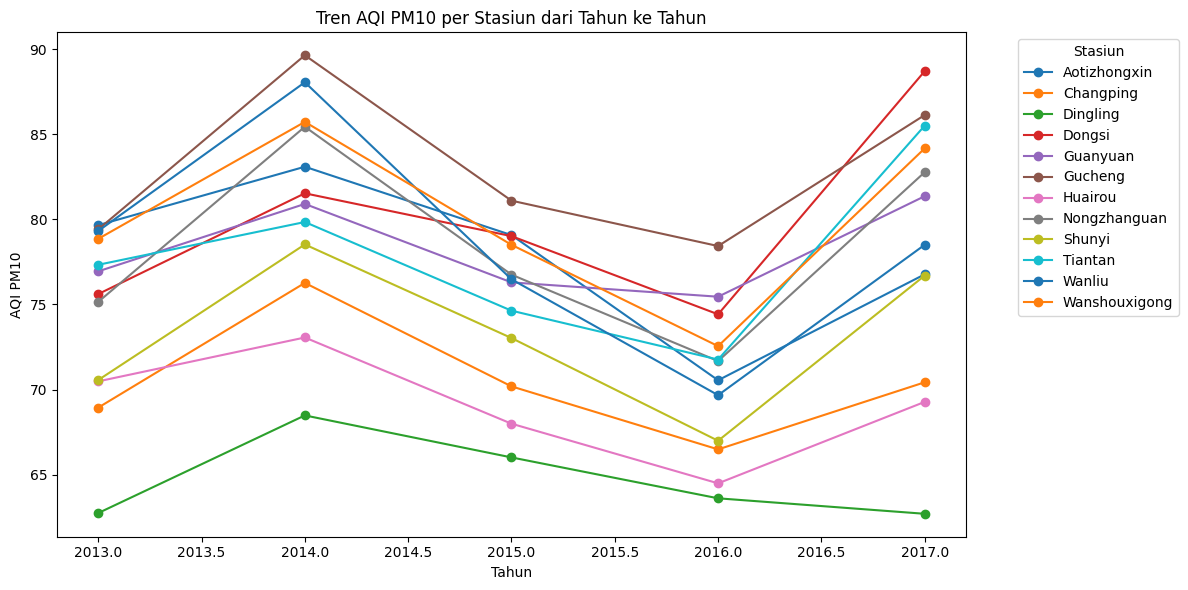

In [88]:
# Agregasi data per tahun dan stasiun (menghitung rata-rata PM2.5 dan PM10)
data_grouped = data.groupby(['year', 'station']).agg({'PM2.5':'mean', 'PM10':'mean'}).reset_index()

# Fungsi untuk menghitung AQI dengan breakpoints yang diberikan
def calc_aqi(concentration, breakpoints):
    for C_low, C_high, I_low, I_high in breakpoints:
        if C_low <= concentration <= C_high:
            aqi = ((I_high - I_low) / (C_high - C_low)) * (concentration - C_low) + I_low
            return aqi
    return None

# Definisikan breakpoint untuk PM2.5 dan PM10 (contoh menggunakan standar US EPA)
bp_pm25 = [
    (0.0, 12.0, 0, 50),
    (12.1, 35.4, 51, 100),
    (35.5, 55.4, 101, 150),
    (55.5, 150.4, 151, 200),
    (150.5, 250.4, 201, 300),
    (250.5, 500.4, 301, 500)
]

bp_pm10 = [
    (0, 54, 0, 50),
    (55, 154, 51, 100),
    (155, 254, 101, 150),
    (255, 354, 151, 200),
    (355, 424, 201, 300),
    (425, 604, 301, 500)
]

# Hitung nilai AQI untuk masing-masing stasiun dan tahun
data_grouped['AQI_PM25'] = data_grouped['PM2.5'].apply(lambda x: calc_aqi(x, bp_pm25))
data_grouped['AQI_PM10'] = data_grouped['PM10'].apply(lambda x: calc_aqi(x, bp_pm10))

# Visualisasi tren AQI PM2.5 per stasiun
plt.figure(figsize=(12, 6))
for station in data_grouped['station'].unique():
    subset = data_grouped[data_grouped['station'] == station]
    plt.plot(subset['year'], subset['AQI_PM25'], marker='o', label=station)
plt.xlabel('Tahun')
plt.ylabel('AQI PM2.5')
plt.title('Tren AQI PM2.5 per Stasiun dari Tahun ke Tahun')
plt.legend(title="Stasiun", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Visualisasi tren AQI PM10 per stasiun
plt.figure(figsize=(12, 6))
for station in data_grouped['station'].unique():
    subset = data_grouped[data_grouped['station'] == station]
    plt.plot(subset['year'], subset['AQI_PM10'], marker='o', label=station)
plt.xlabel('Tahun')
plt.ylabel('AQI PM10')
plt.title('Tren AQI PM10 per Stasiun dari Tahun ke Tahun')
plt.legend(title="Stasiun", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Berdasarkan visualisasi tren AQI PM10 dan PM2.5 di setiap stasiun dari tahun ke tahun, dapat disimpulkan beberapa pola utama terkait kualitas udara:  

1. **Pola Umum**  
   - Secara umum, tren AQI di berbagai stasiun menunjukkan pola **naik-turun**.  
   - AQI meningkat dari tahun 2013 ke 2014, mengalami **penurunan sekitar tahun 2015-2016**, dan kembali meningkat pada 2017.  
   - Pola ini terlihat baik untuk PM10 maupun PM2.5.  

2. **Penurunan pada 2016**  
   - Hampir semua stasiun mengalami **penurunan AQI pada tahun 2016**, yang mengindikasikan adanya perbaikan kualitas udara atau pengurangan polutan di tahun tersebut.  
   - Faktor yang mungkin mempengaruhi adalah kebijakan lingkungan atau perubahan kondisi cuaca.  

3. **Peningkatan Signifikan di 2017**  
   - Pada tahun 2017, AQI kembali meningkat drastis di hampir semua stasiun, terutama pada PM2.5.  
   - Ini menunjukkan peningkatan polusi udara di tahun tersebut, yang bisa disebabkan oleh aktivitas industri, cuaca, atau faktor lainnya.  

4. **Variasi Antar Stasiun**  
   - Meskipun pola umum mirip, ada beberapa variasi antar stasiun.  
   - Beberapa stasiun memiliki AQI yang selalu lebih tinggi dibandingkan lainnya, menunjukkan tingkat polusi yang lebih besar.  

Secara keseluruhan, kualitas udara mengalami **fluktuasi**, dengan tahun 2016 sebagai titik di mana udara relatif lebih bersih, sebelum kembali memburuk pada 2017.

### Pertanyaan 2:

C:\Users\FX506\AppData\Local\Temp\ipykernel_29856\3965855832.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top5_pm25_sorted['label'],


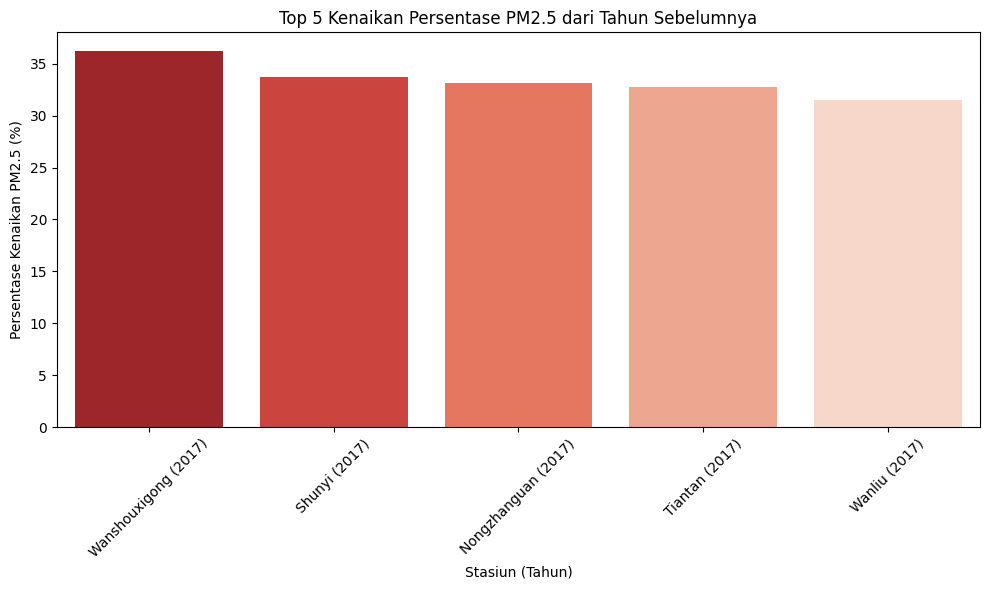

C:\Users\FX506\AppData\Local\Temp\ipykernel_29856\3965855832.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top5_pm10_sorted['label'],


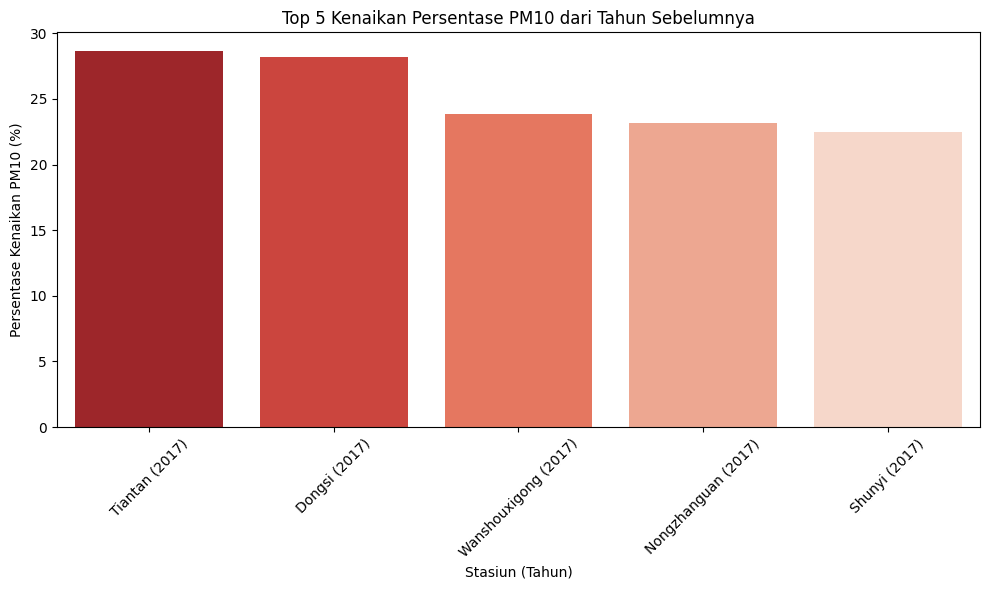

In [89]:
# --- 1. Agregasi Data ---
# Hitung rata-rata PM2.5 dan PM10 per stasiun dan per tahun
agg_data = data.groupby(['station', 'year']).agg({'PM2.5': 'mean', 'PM10': 'mean'}).reset_index()
agg_data = agg_data.sort_values(['station', 'year'])

# --- 2. Hitung Persentase Kenaikan ---
# Menghitung persentase kenaikan dari tahun sebelumnya untuk setiap stasiun
agg_data['PM2.5_pct_increase'] = agg_data.groupby('station')['PM2.5'].pct_change() * 100
agg_data['PM10_pct_increase'] = agg_data.groupby('station')['PM10'].pct_change() * 100

# Hapus baris yang tidak memiliki nilai kenaikan (tahun pertama tiap stasiun)
agg_data = agg_data.dropna(subset=['PM2.5_pct_increase', 'PM10_pct_increase'])

# --- 3. Ambil Top 5 Kenaikan Tertinggi ---
# Ambil 5 kenaikan tertinggi untuk PM2.5 dan PM10
top5_pm25 = agg_data.nlargest(5, 'PM2.5_pct_increase')
top5_pm10 = agg_data.nlargest(5, 'PM10_pct_increase')

# Buat kolom label gabungan stasiun dan tahun, misalnya "Guanyen (2016)"
top5_pm25['label'] = top5_pm25.apply(lambda row: f"{row['station']} ({int(row['year'])})", axis=1)
top5_pm10['label'] = top5_pm10.apply(lambda row: f"{row['station']} ({int(row['year'])})", axis=1)

# --- 4. Visualisasi dengan Bar Chart Vertikal dan Gradasi Warna Merah ---

# Untuk PM2.5
top5_pm25_sorted = top5_pm25.sort_values('PM2.5_pct_increase', ascending=False)
# Buat warna dengan gradasi dari palet 'Reds' dengan jumlah warna sesuai jumlah bar
colors_pm25 = sns.color_palette("Reds", n_colors=len(top5_pm25_sorted))[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=top5_pm25_sorted['label'], 
            y=top5_pm25_sorted['PM2.5_pct_increase'], 
            palette=colors_pm25)
plt.xlabel('Stasiun (Tahun)')
plt.ylabel('Persentase Kenaikan PM2.5 (%)')
plt.title('Top 5 Kenaikan Persentase PM2.5 dari Tahun Sebelumnya')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Untuk PM10
top5_pm10_sorted = top5_pm10.sort_values('PM10_pct_increase', ascending=False)
colors_pm10 = sns.color_palette("Reds", n_colors=len(top5_pm10_sorted))[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=top5_pm10_sorted['label'], 
            y=top5_pm10_sorted['PM10_pct_increase'], 
            palette=colors_pm10)
plt.xlabel('Stasiun (Tahun)')
plt.ylabel('Persentase Kenaikan PM10 (%)')
plt.title('Top 5 Kenaikan Persentase PM10 dari Tahun Sebelumnya')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



### **2. Di stasiun mana dan pada tahun berapa terjadi kenaikan persentase polusi udara tertinggi? Apa penyebab utama kenaikan ini?**  

#### **Jawaban:**  
Berdasarkan visualisasi data, kenaikan persentase polusi udara tertinggi terjadi di:  
1. **PM2.5** – **Stasiun Wanshouxigong pada tahun 2017**, dengan kenaikan **sekitar 36%** dibandingkan tahun sebelumnya.  
2. **PM10** – **Stasiun Tiantan pada tahun 2017**, dengan kenaikan **hampir 29%** dibandingkan tahun sebelumnya.  

#### **Penyebab Utama Kenaikan Ini:**  
Kenaikan signifikan dalam konsentrasi PM2.5 dan PM10 pada tahun 2017 bisa disebabkan oleh beberapa faktor utama:  

1. **Kondisi Cuaca yang Tidak Menguntungkan**  
   - Tahun 2017 di beberapa wilayah mengalami kondisi atmosfer yang tidak mendukung dispersi polutan, seperti suhu rendah, kelembaban tinggi, dan tekanan udara yang menyebabkan polutan tetap berada di dekat permukaan.  

2. **Peningkatan Aktivitas Industri dan Kendaraan**  
   - Wanshouxigong dan Tiantan merupakan area dengan aktivitas industri dan transportasi tinggi. Peningkatan produksi industri dan jumlah kendaraan bermotor dapat meningkatkan emisi partikulat di udara.  

3. **Kebakaran Biomassa atau Aktivitas Pertanian**  
   - Pembakaran lahan pertanian atau biomassa di sekitar wilayah tersebut juga dapat menyumbang peningkatan partikel PM2.5 dan PM10.  

4. **Efek Musiman dan Polusi dari Wilayah Lain**  
   - Selama musim dingin, penggunaan batu bara untuk pemanas rumah tangga dan industri meningkat, yang berkontribusi pada peningkatan partikel polusi udara. Selain itu, polusi bisa datang dari daerah sekitar karena pola angin yang membawa polutan dari satu kota ke kota lain.  

5. **Penurunan Efektivitas Regulasi Lingkungan**  
   - Jika pada periode tersebut terjadi kelonggaran dalam penerapan kebijakan pengurangan emisi industri dan transportasi, maka kemungkinan besar terjadi lonjakan polusi.  

#### **Kesimpulan**  
Tahun 2017 menunjukkan kenaikan signifikan polusi udara di beberapa stasiun, terutama Wanshouxigong (PM2.5) dan Tiantan (PM10). Peningkatan ini didorong oleh kombinasi faktor lingkungan, aktivitas manusia, dan kondisi cuaca yang memperparah kualitas udara. Regulasi ketat dan inovasi dalam pengelolaan polusi sangat diperlukan untuk mencegah lonjakan serupa di masa depan.  


## Analisis Lanjutan (Opsional)

Last but not least, saya memiliki satu pertanyaan terakhir yang dapat melengkapi pemahaman saya mengenai pola polusi udara:  

#### **3. Bagaimana pola pengelompokan tingkat polusi udara dalam satu tahun? Apakah terdapat pola musiman yang signifikan?**  

Untuk menjawab pertanyaan ini, saya akan menggunakan **K-Means Clustering** untuk mengelompokkan hari dalam setahun berdasarkan tingkat polusi udara, terutama dengan mempertimbangkan nilai **PM2.5 dan PM10**, yang merupakan indikator utama kualitas udara.  

### **Tujuan Analisis:**  
- Mengidentifikasi pola musiman dalam tingkat polusi udara dengan mengelompokkan hari berdasarkan kadar PM2.5 dan PM10.  
- Menentukan apakah ada musim tertentu yang mengalami peningkatan atau penurunan polusi udara secara signifikan.  
- Mendukung kebijakan lingkungan, misalnya, jika polusi udara meningkat pada musim dingin akibat penggunaan batu bara, maka pemerintah dapat menerapkan kebijakan yang lebih ketat untuk mengurangi dampaknya.  

### **Alasan Mengapa Pertanyaan Ini Penting:**  
- Memungkinkan **analisis berbasis data** untuk memahami pola musiman polusi udara, yang dapat membantu perencanaan dan mitigasi lingkungan.  
- Jika ditemukan pola bahwa polusi meningkat di musim tertentu, langkah pencegahan dapat dilakukan lebih **proaktif dan strategis**.  
- Hasil dari analisis ini dapat digunakan sebagai **dasar untuk model prediksi kualitas udara**, sehingga masyarakat dapat memperoleh peringatan dini terhadap kondisi udara yang memburuk dan dapat mengambil langkah-langkah perlindungan yang lebih efektif.  

Dengan menjawab pertanyaan ini, saya berharap dapat memahami lebih dalam bagaimana **faktor musiman mempengaruhi tingkat polusi udara**, serta bagaimana pola tersebut dapat digunakan untuk pengambilan keputusan yang lebih baik dalam pengelolaan kualitas udara.

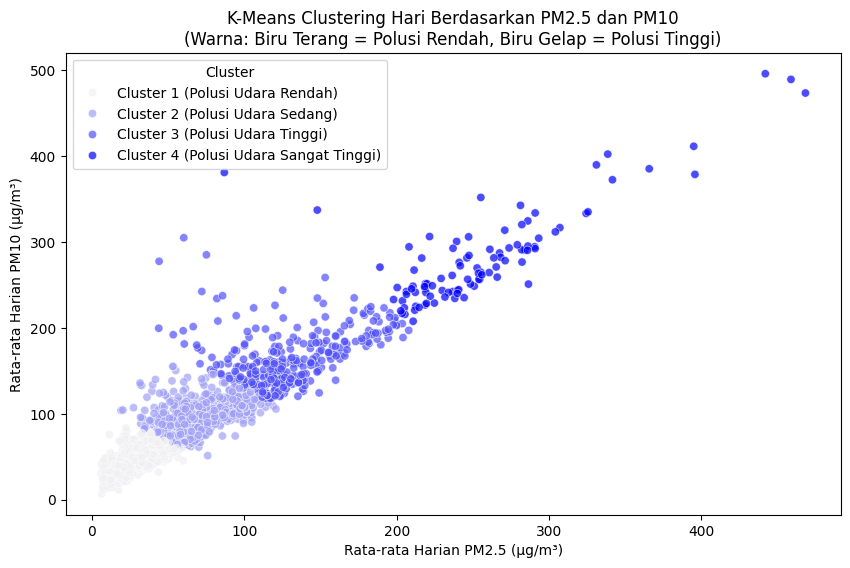

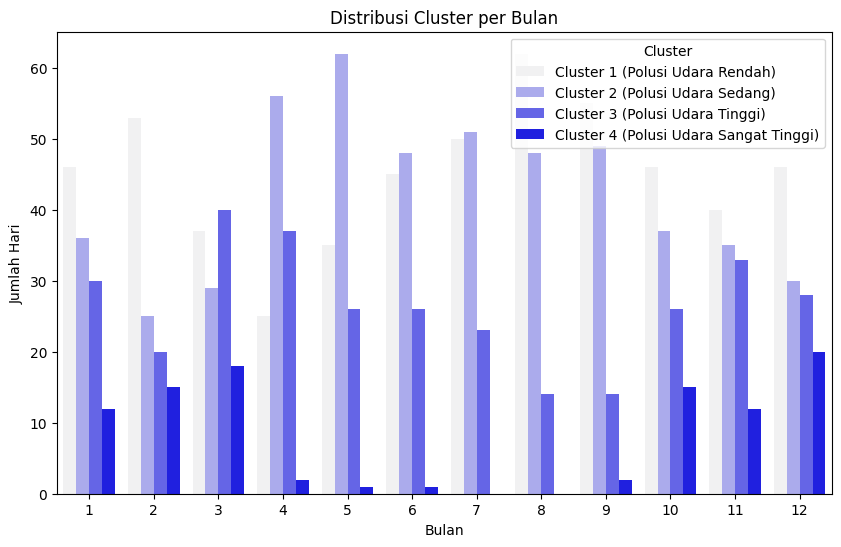

In [96]:
from sklearn.cluster import KMeans

# --- 1. Agregasi Data Harian ---
# Buat kolom tanggal dari kolom year, month, day
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])

# Agregasi data harian: hitung rata-rata PM2.5 dan PM10 per tanggal
daily_data = data.groupby('date').agg({'PM2.5': 'mean', 'PM10': 'mean'}).reset_index()

# Tambahkan kolom bulan untuk analisis musiman
daily_data['month'] = daily_data['date'].dt.month

# --- 2. K-Means Clustering ---
# Gunakan fitur PM2.5 dan PM10 untuk clustering
X = daily_data[['PM2.5', 'PM10']].values

# Tentukan jumlah cluster, misalnya 4
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
daily_data['cluster'] = kmeans.fit_predict(X)

# Hitung rata-rata PM2.5 dan PM10 untuk setiap cluster
cluster_means = daily_data.groupby('cluster')[['PM2.5', 'PM10']].mean().sort_values(by='PM2.5')

# Buat label deskriptif berdasarkan rata-rata polusi tiap cluster
cluster_labels = {
    cluster_means.index[0]: "Cluster 1 (Polusi Udara Rendah)",
    cluster_means.index[1]: "Cluster 2 (Polusi Udara Sedang)",
    cluster_means.index[2]: "Cluster 3 (Polusi Udara Tinggi)",
    cluster_means.index[3]: "Cluster 4 (Polusi Udara Sangat Tinggi)"
}

# Tambahkan label deskriptif ke dalam dataframe
daily_data['cluster_label'] = daily_data['cluster'].map(cluster_labels)

# Buat custom palette dengan gradasi biru, di mana warna terang untuk polusi rendah dan gelap untuk polusi tinggi
custom_palette = sns.light_palette("blue", n_colors=4)
# Pastikan urutan hue sesuai dengan urutan cluster berdasarkan rata-rata PM2.5 (dari rendah ke tinggi)
hue_order = [cluster_labels[k] for k in cluster_means.index]

# --- 3. Visualisasi Hasil Clustering ---

# Scatter Plot: Warna berdasarkan cluster dengan gradasi biru
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=daily_data, 
    x='PM2.5', 
    y='PM10', 
    hue='cluster_label', 
    palette=custom_palette, 
    hue_order=hue_order, 
    alpha=0.7
)
plt.title("K-Means Clustering Hari Berdasarkan PM2.5 dan PM10\n(Warna: Biru Terang = Polusi Rendah, Biru Gelap = Polusi Tinggi)")
plt.xlabel("Rata-rata Harian PM2.5 (µg/m³)")
plt.ylabel("Rata-rata Harian PM10 (µg/m³)")
plt.legend(title='Cluster')
plt.show()

# Countplot: Distribusi cluster per bulan dengan gradasi biru
plt.figure(figsize=(10,6))
sns.countplot(
    data=daily_data, 
    x='month', 
    hue='cluster_label', 
    palette=custom_palette, 
    hue_order=hue_order
)
plt.title("Distribusi Cluster per Bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Hari")
plt.legend(title='Cluster')
plt.show()



Berdasarkan hasil analisis clustering menggunakan K-Means pada data harian polusi udara (PM2.5 dan PM10), kita dapat mengidentifikasi pola musiman yang signifikan dalam tingkat polusi udara sepanjang tahun.

### **1. Pola Pengelompokan Polusi Udara dalam Satu Tahun**
Hasil clustering menunjukkan bahwa hari-hari dalam setahun dapat dikategorikan ke dalam empat kelompok berdasarkan tingkat polusi udara:
- **Cluster 1 (Polusi Udara Rendah)** – Ditandai dengan warna biru paling terang.
- **Cluster 2 (Polusi Udara Sedang)** – Warna biru yang sedikit lebih gelap.
- **Cluster 3 (Polusi Udara Tinggi)** – Warna biru lebih pekat.
- **Cluster 4 (Polusi Udara Sangat Tinggi)** – Warna biru yang paling gelap.

Dari grafik distribusi cluster per bulan, terlihat bahwa bulan-bulan tertentu memiliki lebih banyak hari dengan tingkat polusi udara yang tinggi dibandingkan bulan lainnya.

### **2. Apakah Ada Pola Musiman yang Signifikan?**
Dari visualisasi distribusi cluster per bulan:
- **Polusi udara rendah hingga sedang (Cluster 1 & 2)** lebih sering terjadi pada pertengahan hingga akhir tahun, terutama di bulan **Juni hingga Agustus**. Ini bisa mengindikasikan kondisi atmosfer yang lebih bersih pada periode tersebut, kemungkinan karena faktor cuaca atau curah hujan yang lebih tinggi yang membantu mengurangi konsentrasi polutan di udara.
- **Polusi udara tinggi hingga sangat tinggi (Cluster 3 & 4)** cenderung lebih dominan di awal tahun, terutama di **Januari hingga Mei**. Ini dapat dikaitkan dengan musim kemarau atau aktivitas industri dan kendaraan yang lebih intensif pada periode tersebut.

### **Kesimpulan**
Terdapat pola musiman dalam tingkat polusi udara:
- **Musim dengan polusi tinggi** umumnya terjadi di awal tahun (Januari – Mei).
- **Musim dengan polusi rendah** lebih sering terjadi di pertengahan hingga akhir tahun (Juni – Agustus).

Pola ini bisa menjadi acuan untuk strategi mitigasi polusi udara, seperti meningkatkan pemantauan kualitas udara di bulan-bulan dengan risiko tinggi dan mengedukasi masyarakat untuk mengurangi aktivitas yang dapat meningkatkan polusi udara.

## Conclusion

Berdasarkan tiga jawaban dari pertanyaan di atas, dapat disimpulkan bahwa:  

### **1. Tren Polusi Udara Mengalami Fluktuasi**  
Polusi udara (PM10 dan PM2.5) tidak menunjukkan tren linear, tetapi mengalami **fluktuasi** dari tahun ke tahun.  
- Tahun **2016** adalah periode di mana kualitas udara membaik secara signifikan.  
- Tahun **2017** terjadi lonjakan drastis polusi udara, terutama di stasiun **Wanshouxigong (PM2.5) dan Tiantan (PM10)**.  

### **2. Faktor Penyebab Kenaikan Polusi Udara**  
Kenaikan polusi udara pada tahun tertentu disebabkan oleh kombinasi beberapa faktor, seperti:  
- **Kondisi atmosfer** yang tidak mendukung penyebaran polutan.  
- **Peningkatan aktivitas industri dan kendaraan** yang meningkatkan emisi partikulat.  
- **Pembakaran biomassa atau aktivitas pertanian** yang menambah polutan udara.  
- **Musim dingin** yang mendorong penggunaan batu bara untuk pemanas, memperburuk kualitas udara.  
- **Penurunan efektivitas regulasi lingkungan** yang menyebabkan lonjakan emisi dari sumber industri dan transportasi.  

### **3. Polusi Udara Memiliki Pola Musiman**  
- **Polusi udara tinggi** terjadi di awal tahun (**Januari – Mei**), terutama karena kondisi cuaca kering dan peningkatan aktivitas industri.  
- **Polusi udara lebih rendah** terjadi di pertengahan hingga akhir tahun (**Juni – Agustus**), kemungkinan karena curah hujan yang lebih tinggi dan kondisi atmosfer yang lebih baik.  

### **Kesimpulan Akhir**  
Polusi udara di berbagai stasiun mengalami **pola naik-turun** dengan faktor lingkungan dan aktivitas manusia sebagai pendorong utama. Tahun **2017 adalah tahun dengan lonjakan polusi tertinggi**, terutama di **Wanshouxigong dan Tiantan**. Selain itu, terdapat **pola musiman**, di mana awal tahun cenderung memiliki tingkat polusi lebih tinggi dibandingkan pertengahan hingga akhir tahun.  

Untuk mengurangi polusi udara, diperlukan **regulasi yang lebih ketat, pemantauan berkala, serta strategi mitigasi** yang memperhitungkan pola musiman dan faktor penyebab utama kenaikan polusi.